In [1]:
import numpy as np
#from numpy import linalg 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import linalg

In [2]:
#counting integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1))
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] = np.log(1 / np.abs(xm - X[i])) 
        sum += F[i]
    return sum * H

#counting baseintegral I
def Int(u, v, i, N):
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1))
    for j in range(N):
        z[j] = halfH + j * h
           
    #middle
    def Func(x): 
        return (np.log(x) * np.power(x, i - 1)) / (np.sqrt(1 - (x + v)*(x + v)))
    for j in range(N):
        res = Func(z[j])
        F[j] = res
    
    sum = 0
    for j in range(N):
        sum += F[j]
    
    interior = h * sum
    return interior 

#beta
def beta(xm, h, N):
    if xm >= 0 and xm <= h:
        return - Int(xm, -xm, 1, N) + (1 / h) * Int(xm, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= h and xm <= 1 - h:
        return - Int(h, -xm, 1, N) + (1 / h) * Int(h, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= 1 - h and xm <= 1:
        return - Int(h, -xm, 1, N) + (1/h) * Int(h, -xm, 2, N) - Int(1-xm, xm, 1, N) + (1 / h) * Int(1-xm, xm, 2, N)
    else:
        print("error")
        return 0

In [3]:
def Processing(N):
    h = 1 / N

    XM = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h

    SN = np.zeros((N + 1, 1))
    for j in range(N + 1):
        SN[j] = 0 + j * h
    
    #creating linear system
    mat = np.zeros((N, N), dtype = np.complex)
    for m in range(N):
        for n in range(N):
            if n == m:
                mat[m, n] = beta(XM[m], h, N) * np.sqrt(1 - XM[m] * XM[m]) + 0 #LEGIT
            else:
                mat[m, n] = I(SN[n], SN[n + 1], XM[m], N) 

    right = np.full((N, 1), 1, dtype = np.complex)
    
    #answer = linalg.solve(mat, right)
    
    answer, inf = sp.sparse.linalg.bicgstab(mat, right)
    print(inf)

    res_real = np.real(answer)
    
    return XM, res_real, N    

In [4]:
res1 = Processing(20)
res2 = Processing(50)
res3 = Processing(100)
res4 = Processing(200)

0
0
0
0


In [5]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'xtick.labelsize': 15})
plt.rcParams.update({'ytick.labelsize': 15})
plt.rcParams['figure.figsize'] = [4, 6]

In [6]:
NS = 500
hS = 1 / NS

XS = np.zeros((NS, 1))
for i in range(NS):
    XS[i] = 0 + (hS / 2) + i * hS

S = np.zeros((NS, 1))
def sln(x):
    return 1 / (2 * np.pi * np.log(2) * np.sqrt(x * (1 - x)))
for i in range(NS):
    S[i] = sln(XS[i])

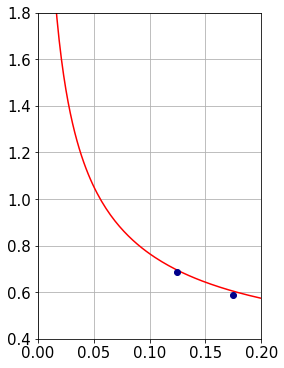

In [7]:
plt.plot(XS[2: NS - 2], S[2: NS - 2], color = 'red')
plt.plot(res1[0][2: res1[2] - 2], res1[1][2: res1[2] - 2], 'bo', color = 'darkblue')

plt.xlim(0.0, 0.2)
plt.ylim(0.4, 1.8)

plt.grid()
plt.show()

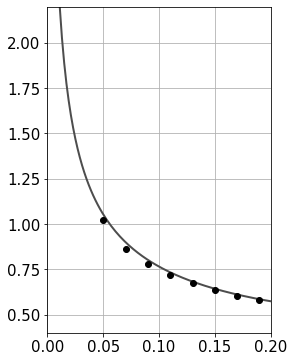

In [8]:
plt.plot(XS[2: NS - 2], S[2: NS - 2], color = '0.3', linewidth = 2) #took in
plt.plot(res2[0][2: res2[2] - 2], res2[1][2: res2[2] - 2], 'bo', color = '0')

plt.xlim(0.0, 0.2)
plt.ylim(0.4, 2.2)

plt.grid()
plt.show()

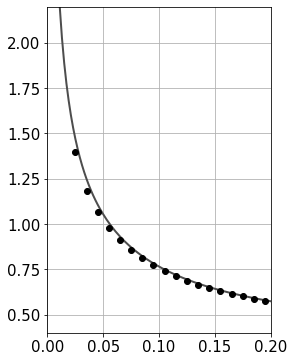

In [9]:
plt.plot(XS[2: NS - 2], S[2: NS - 2], color = '0.3', linewidth = 2) #took in
plt.plot(res3[0][2: res3[2] - 2], res3[1][2: res3[2] - 2], 'bo', color = '0')

plt.xlim(0.0, 0.2)
plt.ylim(0.4, 2.2)

plt.grid()
plt.show()

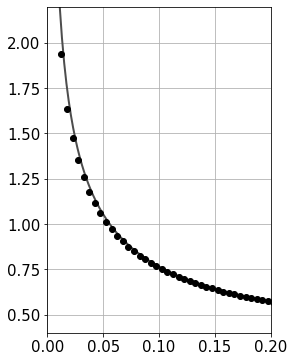

In [10]:
plt.plot(XS[2: NS - 2], S[2: NS - 2], color = '0.3', linewidth = 2) #took in
plt.plot(res4[0][2: res4[2] - 2], res4[1][2: res4[2] - 2], 'bo', color = '0')

plt.xlim(0.0, 0.2)
plt.ylim(0.4, 2.2)

plt.grid()
plt.show()